<a href="https://colab.research.google.com/github/theradtad/DL-fastai/blob/main/FastAI_DL_Chp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

!pip install -Uqq fastai

In [5]:
#!/bin/bash
!curl -L -o ./lions-or-cheetahs-image-classification.zip https://www.kaggle.com/api/v1/datasets/download/mikoajfish99/lions-or-cheetahs-image-classification

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 71.3M  100 71.3M    0     0  64.2M      0  0:00:01  0:00:01 --:--:--  198M


In [6]:
1 !ls /

SyntaxError: invalid syntax (ipython-input-2142213507.py, line 1)

In [8]:
!unzip lions-or-cheetahs-image-classification.zip

Archive:  lions-or-cheetahs-image-classification.zip
  inflating: images/Cheetahs/0052cb267268c59e.jpg  
  inflating: images/Cheetahs/00707659aba29334.jpg  
  inflating: images/Cheetahs/007f9ffc01c7b106.jpg  
  inflating: images/Cheetahs/00bb45a8568a3474.jpg  
  inflating: images/Cheetahs/00c8d36882dd6d37.jpg  
  inflating: images/Cheetahs/00d100b0231b60e6.jpg  
  inflating: images/Cheetahs/00d9eb862ba3dfc6.jpg  
  inflating: images/Cheetahs/012f5ecbf49e1da0.jpg  
  inflating: images/Cheetahs/01750ba1a197e3ad.jpg  
  inflating: images/Cheetahs/01d688c043bdbfbb.jpg  
  inflating: images/Cheetahs/0230496e4a8ed917.jpg  
  inflating: images/Cheetahs/02871f24d5abe59c.jpg  
  inflating: images/Cheetahs/029b39c0b65ebeb3.jpg  
  inflating: images/Cheetahs/02a0439923768403.jpg  
  inflating: images/Cheetahs/02a5846a35629f1d.jpg  
  inflating: images/Cheetahs/02b086c4e96396f6.jpg  
  inflating: images/Cheetahs/02dd8dd4344b04a7.jpg  
  inflating: images/Cheetahs/0321448f2848ab99.jpg  
  inflating

In [9]:
!ls

images	lions-or-cheetahs-image-classification.zip  sample_data


In [10]:
from fastai.vision.all import *

In [15]:
path = "./images/"
failed_images = verify_images(get_image_files(path))
failed_images.map(Path.unlink)
len(failed_images)
failed_images

(#0) []

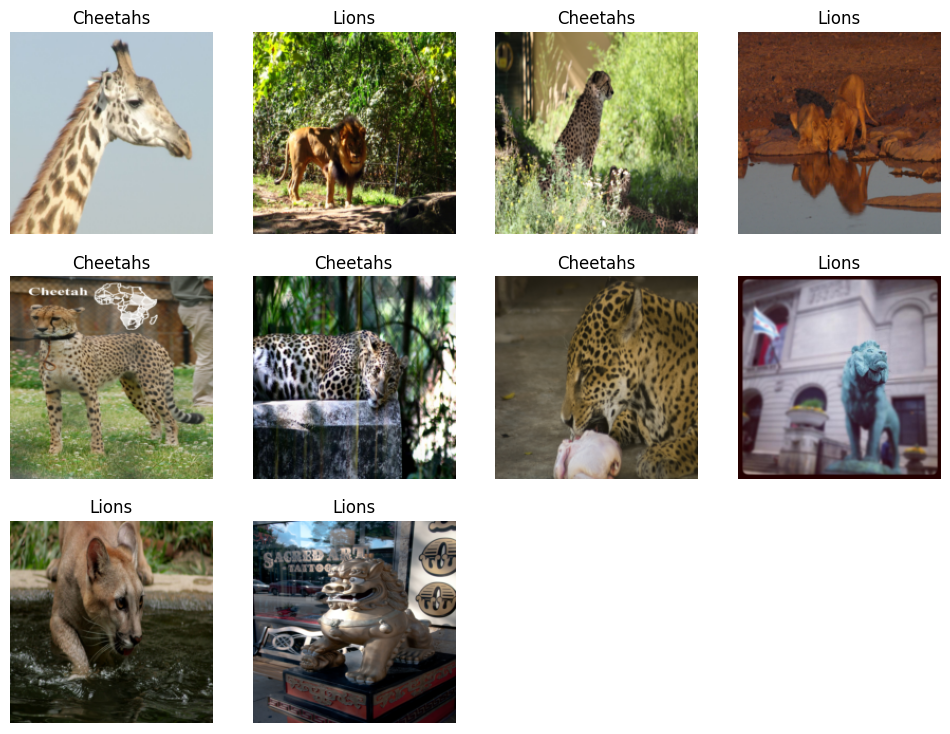

In [17]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=20)

dls.show_batch(max_n=10)

In [18]:
learner = vision_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 29.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.901063,0.265713,0.100000,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.337037,0.301374,0.075000,00:34
1,0.212340,0.406343,0.075000,00:37
2,0.172913,0.383438,0.075000,00:35


In [19]:
is_cheetah, _, probs = learner.predict(PILImage.create('cheetah.jpg'))
print(f"This is a: {is_cheetah}.")
print(f"Probability it's a cheetah: {probs[0]:.4f}")

This is a: Cheetahs.
Probability it's a cheetah: 0.9999


In [21]:
is_cheetah, _, probs = learner.predict(PILImage.create('lion.jpg'))
print(f"This is a: {is_cheetah}.")
print(f"Probability it's a cheetah: {probs[0]:.4f}")

This is a: Lions.
Probability it's a cheetah: 0.0610
